# Music Genre Classification

In [1]:
# !pip install --upgrade gdown
# !gdown 1-4elQY1C-n23u3QqomnLiI9CN9iPrWC3

In [2]:
# !tar -xzf genres.tar.gz

In [3]:
from pathlib import Path

data_dir = Path('genres/')
wav_fns = list(data_dir.rglob('*.wav'))
wav_fns.sort()
wav_fns

[PosixPath('genres/blues/blues.00000.wav'),
 PosixPath('genres/blues/blues.00001.wav'),
 PosixPath('genres/blues/blues.00002.wav'),
 PosixPath('genres/blues/blues.00003.wav'),
 PosixPath('genres/blues/blues.00004.wav'),
 PosixPath('genres/blues/blues.00005.wav'),
 PosixPath('genres/blues/blues.00006.wav'),
 PosixPath('genres/blues/blues.00007.wav'),
 PosixPath('genres/blues/blues.00008.wav'),
 PosixPath('genres/blues/blues.00009.wav'),
 PosixPath('genres/blues/blues.00010.wav'),
 PosixPath('genres/blues/blues.00011.wav'),
 PosixPath('genres/blues/blues.00012.wav'),
 PosixPath('genres/blues/blues.00013.wav'),
 PosixPath('genres/blues/blues.00014.wav'),
 PosixPath('genres/blues/blues.00015.wav'),
 PosixPath('genres/blues/blues.00016.wav'),
 PosixPath('genres/blues/blues.00017.wav'),
 PosixPath('genres/blues/blues.00018.wav'),
 PosixPath('genres/blues/blues.00019.wav'),
 PosixPath('genres/blues/blues.00020.wav'),
 PosixPath('genres/blues/blues.00021.wav'),
 PosixPath('genres/blues/blues.0

In [4]:
# generator와 list 차이
# wav_gen = data_dir.rglob('*.wav')
# for wav in wav_gen:
#   print(wav)

NameError: name 'wav_gen' is not defined

In [ ]:
wav_fns[:10]

[PosixPath('genres/blues/blues.00000.wav'),
 PosixPath('genres/blues/blues.00001.wav'),
 PosixPath('genres/blues/blues.00002.wav'),
 PosixPath('genres/blues/blues.00003.wav'),
 PosixPath('genres/blues/blues.00004.wav'),
 PosixPath('genres/blues/blues.00005.wav'),
 PosixPath('genres/blues/blues.00006.wav'),
 PosixPath('genres/blues/blues.00007.wav'),
 PosixPath('genres/blues/blues.00008.wav'),
 PosixPath('genres/blues/blues.00009.wav')]

# read audio

In [10]:
import torchaudio
import IPython.display as ipd

wav_fn = wav_fns[0]
y, sr = torchaudio.load(wav_fn)

In [ ]:
sr, y.shape, y.shape[1] / sr

(22050, torch.Size([1, 661794]), 30.013333333333332)

In [ ]:
sr
y.shape

torch.Size([1, 661794])

In [ ]:
ipd.display(ipd.Audio(y, rate=sr))
ipd.display(ipd.Audio(wav_fns[1]))

In [ ]:
# CD 1장 ~= 700 MB, 70분/ 16bit 44.1kHz


In [ ]:
??torchaudio.transforms.AmplitudeToDB

Init signature:
torchaudio.transforms.AmplitudeToDB(
    stype: str = 'power',
    top_db: Union[float, NoneType] = None,
) -> None
Source:        
class AmplitudeToDB(torch.nn.Module):
    r"""Turn a tensor from the power/amplitude scale to the decibel scale.

    This output depends on the maximum value in the input tensor, and so
    may return different values for an audio clip split into snippets vs. a
    a full clip.

    Args:
        stype (str, optional): scale of input tensor (``'power'`` or ``'magnitude'``). The
            power being the elementwise square of the magnitude. (Default: ``'power'``)
        top_db (float or None, optional): minimum negative cut-off in decibels.  A reasonable
            number is 80. (Default: ``None``)
    """
    __constants__ = ['multiplier', 'amin', 'ref_value', 'db_multiplier']

    def __init__(self, stype: str = 'power', top_db: Optional[float] = None) -> None:
        super(AmplitudeToDB, self).__init__()
        self.stype = stype
 

In [ ]:
??torchaudio.transforms.MelScale

Init signature:
torchaudio.transforms.MelScale(
    n_mels: int = 128,
    sample_rate: int = 16000,
    f_min: float = 0.0,
    f_max: Union[float, NoneType] = None,
    n_stft: int = 201,
    norm: Union[str, NoneType] = None,
    mel_scale: str = 'htk',
) -> None
Source:        
class MelScale(torch.nn.Module):
    r"""Turn a normal STFT into a mel frequency STFT, using a conversion
    matrix.  This uses triangular filter banks.

    Args:
        n_mels (int, optional): Number of mel filterbanks. (Default: ``128``)
        sample_rate (int, optional): Sample rate of audio signal. (Default: ``16000``)
        f_min (float, optional): Minimum frequency. (Default: ``0.``)
        f_max (float or None, optional): Maximum frequency. (Default: ``sample_rate // 2``)
        n_stft (int, optional): Number of bins in STFT. See ``n_fft`` in :class:`Spectrogram`. (Default: ``201``)
        norm (str or None, optional): If ``'slaney'``, divide the triangular mel weights by the width of the me

In [ ]:
import torch
n_fft=1024
spec_converter = torchaudio.transforms.Spectrogram(n_fft=n_fft)
mel_converter = torchaudio.transforms.MelScale(sample_rate=22050, f_max=11025, n_stft=n_fft//2+1)
db_converter = torchaudio.transforms.AmplitudeToDB()

spec = spec_converter(y)

# db_spec = db_converter(spec)
db_spec = torch.log(spec)

In [ ]:
mel_converter.f_min, mel_converter.n_mels

(0.0, 128)

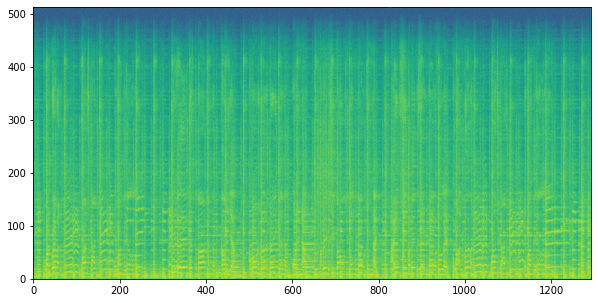

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.imshow(db_spec[0], aspect='auto', origin='lower')

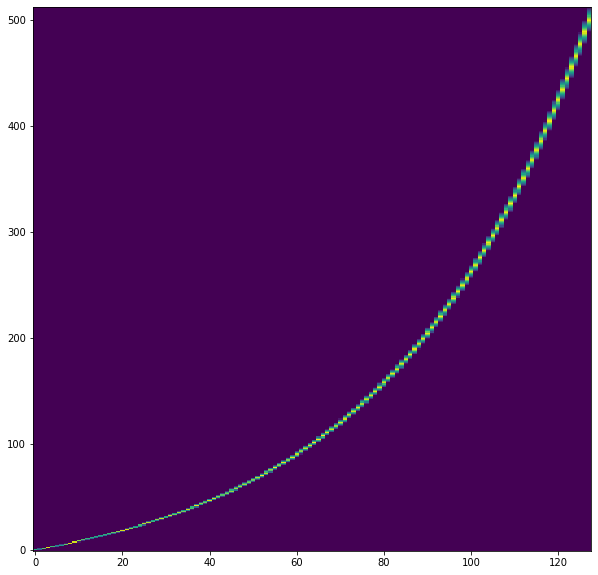

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(mel_converter.fb, aspect='auto', origin='lower', interpolation='nearest')

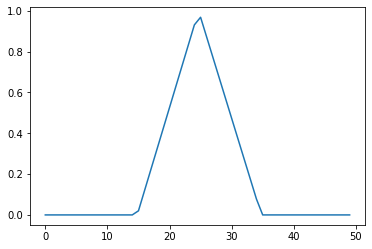

In [ ]:
plt.plot(mel_converter.fb[400:450,120])

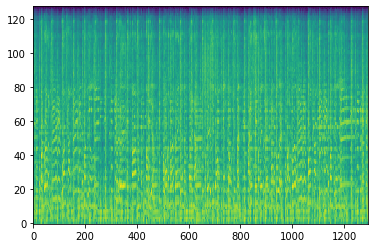

In [ ]:
mel_spec = mel_converter(spec)
mel_db_spec = db_converter(mel_spec)

plt.imshow(mel_db_spec[0], aspect='auto', origin='lower', interpolation='nearest')

In [ ]:
# torch.set_printoption(sci_mode=False)
spec

tensor([[[2.1072e+01, 1.0069e+00, 1.2462e+00,  ..., 3.0329e+00,
          2.3376e-01, 7.9152e+01],
         [3.1707e+01, 5.8799e+00, 4.6018e+00,  ..., 6.9395e+00,
          2.7755e-01, 1.1763e+02],
         [1.7526e+01, 2.1955e+01, 2.1111e+01,  ..., 4.9722e+01,
          3.9515e+01, 2.7733e+02],
         ...,
         [7.1310e-05, 8.2960e-09, 7.4475e-09,  ..., 5.5360e-08,
          3.7699e-10, 3.0511e-05],
         [6.5978e-05, 2.2717e-08, 1.1350e-09,  ..., 1.0449e-08,
          6.3313e-08, 3.0273e-05],
         [6.2682e-05, 3.9870e-10, 2.3309e-09,  ..., 1.0123e-08,
          1.4869e-07, 2.8237e-05]]])

In [ ]:
db_spec

tensor([[[ 3.0479e+00,  6.8847e-03,  2.2012e-01,  ...,  1.1095e+00,
          -1.4535e+00,  4.3714e+00],
         [ 3.4565e+00,  1.7715e+00,  1.5265e+00,  ...,  1.9372e+00,
          -1.2818e+00,  4.7675e+00],
         [ 2.8637e+00,  3.0890e+00,  3.0498e+00,  ...,  3.9064e+00,
           3.6767e+00,  5.6252e+00],
         ...,
         [-9.5485e+00, -1.8607e+01, -1.8715e+01,  ..., -1.6709e+01,
          -2.1699e+01, -1.0397e+01],
         [-9.6262e+00, -1.7600e+01, -2.0597e+01,  ..., -1.8377e+01,
          -1.6575e+01, -1.0405e+01],
         [-9.6774e+00, -2.1643e+01, -1.9877e+01,  ..., -1.8408e+01,
          -1.5721e+01, -1.0475e+01]]])

# Define Model

In [11]:
import torch.nn as nn

class GenreClassifier(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim=10):
    super().__init__()
    self.layer1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
    self.layer2 = nn.Linear(hidden_dim, hidden_dim)
    self.layer3 = nn.Linear(hidden_dim, output_dim)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer1(x)
    # x = torch.relu(x)
    # x = x.relu()
    x = self.relu(x)
    x = self.layer2(x)
    x = self.relu(x)
    x = self.layer3(x)
    return x
    # return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model = GenreClassifier(input_dim=128*3, hidden_dim=64)


In [12]:
mel_db_spec.shape
test_input = mel_db_spec[:, :, 600:603]
test_input.shape
model(test_input)

NameError: name 'mel_db_spec' is not defined

In [ ]:
# flatten input tensor 
# flattened_input = test_input.reshape(test_input.shape[0], test_input.shape[1] * test_input.shape[2])
# flattened_input = test_input.reshape(test_input.shape[0], -1)
flattened_input = torch.flatten(test_input, 1,2)

test_input.shape, flattened_input.shape

(torch.Size([1, 128, 3]), torch.Size([1, 384]))

In [ ]:
model(flattened_input)

tensor([[ 0.3059,  0.2024,  0.7874,  0.2555, -0.6020,  1.7059, -1.1372, -1.9546,
         -0.4941,  1.7775]], grad_fn=<AddmmBackward0>)

In [7]:
wav_fns[0].parent.name

'blues'

In [13]:
import random

class Dataset:
  def __init__(self, data_dir, num_slice_len=3, sr=22050):
    self.data_dir = Path(data_dir)
    self.wav_fns = sorted(list(self.data_dir.rglob('*.wav')))
    print(f"Total {len(self.wav_fns)} pieces exist in the directory")

    self.num_slice_len = num_slice_len
    self.sr = sr
    self.genre_names = sorted(list(set([x.parent.name for x in wav_fns])))
    self.gen2idx = {name: i for i, name in enumerate(self.genre_names) }

  def __len__(self):
    return len(self.wav_fns)
    pass

  def __getitem__(self, idx):
    # return audio and label of idx-th data sample
    wav_fn = self.wav_fns[idx]
    y, sr = torchaudio.load(wav_fn)
    assert sr == self.sr
    y = y.mean(dim=0)
    assert y.ndim == 1
    random_slice_position = random.randint(0, len(y)-1-int(sr*self.num_slice_len))
    
    sliced = y[random_slice_position:random_slice_position+int(sr*self.num_slice_len)]
    label = self.gen2idx[wav_fn.parent.name]
    return sliced, label


dataset = Dataset(data_dir='genres/')
sliced_audio, label = dataset[0]
# random.randint(0,10)
len(sliced_audio)

Total 1000 pieces exist in the directory


66150

In [14]:
dataset.genre_names[label]

'blues'

In [15]:
sliced_audio.shape

torch.Size([66150])

In [18]:
import torch
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)

batch = next(iter(dataloader))
audios, labels = batch

In [19]:
# audios, audios.shape
labels

tensor([8, 5, 7, 6, 6, 8, 7, 5])

In [20]:
class Audio2Spec(nn.Module):
  def __init__(self, sr, n_fft, n_mels):
    super().__init__()
    self.spec_converter = torchaudio.transforms.Spectrogram(n_fft=n_fft)
    self.mel_converter = torchaudio.transforms.MelScale(sample_rate=sr, f_max=4000, n_stft=n_fft//2+1, n_mels=n_mels)
    self.db_converter = torchaudio.transforms.AmplitudeToDB()

  def forward(self, x):
    mel_spec = self.mel_converter(self.spec_converter(x))
    db_mel_spec = self.db_converter(mel_spec)
    return db_mel_spec

audio2spec = Audio2Spec(sr=22050, n_fft=2048, n_mels=64)
spec_batch = audio2spec(audios)
spec_batch.shape

torch.Size([8, 64, 65])

In [21]:
torch.set_printoptions(sci_mode=False)
torch.max(spec_batch)

tensor(47.8614)

In [22]:
class GenreClassifierWithSpec(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim=10):
    super().__init__()
    self.spec_converter = Audio2Spec(sr=22050, n_fft=2048, n_mels=64)
    self.layer1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
    self.layer2 = nn.Linear(hidden_dim, hidden_dim)
    self.layer2_5 = nn.Linear(hidden_dim, hidden_dim)
    self.layer3 = nn.Linear(hidden_dim, output_dim)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.spec_converter(x) /50 # Num Batch x Num Mel Bins x Num timeframes
    # flatten

    x = torch.flatten(x, 1,2)

    x = self.layer1(x)
    # x = torch.relu(x)
    # x = x.relu()
    x = self.relu(x)
    x = self.layer2(x)
    x = self.relu(x)
    x = self.layer2_5(x).relu()
    x = self.layer3(x)
    return x

model = GenreClassifierWithSpec(64*22, 64)

In [23]:
model.layer2.weight

Parameter containing:
tensor([[ 0.0101,  0.0545, -0.1107,  ..., -0.0342, -0.1139, -0.0115],
        [-0.0472, -0.0729, -0.0178,  ..., -0.1103, -0.0760,  0.0688],
        [-0.1049, -0.0252, -0.1216,  ..., -0.0447,  0.0662, -0.0685],
        ...,
        [-0.0727,  0.0514, -0.1167,  ...,  0.0972,  0.1027, -0.0815],
        [ 0.0706, -0.0131,  0.1071,  ..., -0.0270,  0.0143,  0.0885],
        [-0.0849, -0.0962,  0.0747,  ..., -0.0985,  0.0400, -0.0539]],
       requires_grad=True)

In [24]:
model(audios).softmax(dim=-1)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x4160 and 1408x64)

In [26]:
trainset, validset, testset = torch.utils.data.random_split(dataset, [700, 150, 150])

# Train set: Model parameter 학습 
# Train set에 대해서 모델의 정확도는 100%에 가깝게 나올 수밖에 없음
# Unseen dataset을 활용해서 모델이 처음보는 데이터에 대해서도 잘 풀수 있는지를 확인
# Valid set / Test set을 나누는 이유
  # Validation set: Model Hyperparameter를 결정하기 위해서 활용
  # 모델의 구조 (레이어를 몇개 쓸건지, 레이어의 사이즈를 어떻게 할건지)
  # 얼마나 오래 학습할 건지 (overfitting이 일어나는 순간이 언제인지, 몇번 학습한 모델을 사용할건지)
  # learning rate를 어떻게 할건지
  

In [27]:
trainset[0], testset[0]

((tensor([-0.0349,  0.0576,  0.1432,  ...,  0.1679,  0.3321,  0.2521]), 6),
 (tensor([-0.3022, -0.4227, -0.5243,  ...,  0.2002,  0.1382,  0.2111]), 3))

In [28]:
len(set(trainset.indices + validset.indices + testset.indices))

1000

- Train set: Model parameter 학습 
- Train set에 대해서 모델의 정확도는 100%에 가깝게 나올 수밖에 없음
- Unseen dataset을 활용해서 모델이 처음보는 데이터에 대해서도 잘 풀수 있는지를 확인
- Valid set / Test set을 나누는 이유
  - Validation set: Model Hyperparameter를 결정하기 위해서 활용
  - 모델의 구조 (레이어를 몇개 쓸건지, 레이어의 사이즈를 어떻게 할건지)
  - 얼마나 오래 학습할 건지 (overfitting이 일어나는 순간이 언제인지, 몇번 학습한 모델을 사용할건지)
  - learning rate를 어떻게 할건지
- 서로 겹치지 않도록 매우 주의해야함
  - leakage가 생기면 실험의 신뢰성이 없어짐
  - 음악의 경우에서는 같은 아티스트의 곡이 여러 스플릿에 들어가는 걸 금지하기도 함

In [29]:
def get_accuracy(pred, label):
  # pred.ndim == 2
  # pred.shape == [Batch_size, Num_classes]
  is_correct = pred.argmax(dim=1).cpu() == label
  return (is_correct.sum() / len(label)).item()

# predicted_class= pred
# pred.argmax(dim=1).cpu(), label, pred.argmax(dim=1).cpu() == label
# get_accuracy(pred, label)

In [30]:
from tqdm.auto import tqdm

model = GenreClassifierWithSpec(64*65, 128)
dataset = Dataset(data_dir='genres/')

trainset, validset, testset = torch.utils.data.random_split(dataset, [700, 150, 150])
dataloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)
valid_loader= torch.utils.data.DataLoader(validset, batch_size=16, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
n_epoch = 10

model.train()
model.to('cuda')
loss_record = []
accuracy_record = []

valid_loss_record = []
valid_acc_record = []

for i in tqdm(range(n_epoch)):
  for batch in tqdm(dataloader, leave=False):
    audio, label = batch
    pred = model(audio.cuda())
    prob = pred.softmax(dim=1)
    prob_of_correct_class = prob[torch.arange(len(label)), label]
    nll = -torch.log(prob_of_correct_class + 1e-8)
    loss = nll.mean()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_record.append(loss.item())
    accuracy = get_accuracy(pred, label)
    accuracy_record.append(accuracy)
  # Get validation result
  # How frequent to get validation is on your choice
  # we don't train model during the validation
  with torch.inference_mode():  # any torch computation under this indent will ignore gradient
    valid_loss = 0
    valid_acc = 0
    num_valid_samples = 0
    for batch in tqdm(valid_loader, leave=False):
      audio, label = batch
      pred = model(audio.cuda())
      prob = pred.softmax(dim=1)
      prob_of_correct_class = prob[torch.arange(len(label)), label]
      nll = -torch.log(prob_of_correct_class + 1e-8)
      # loss = nll.mean()

      valid_loss += nll.sum().item()
      acc = get_accuracy(pred, label)
      valid_acc += acc * len(label)
      num_valid_samples += len(label)
    valid_loss /= num_valid_samples
    valid_acc /= num_valid_samples
    valid_loss_record.append(valid_loss)
    valid_acc_record.append(valid_acc)

    

Total 1000 pieces exist in the directory


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa376b94670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa376b94670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa376b94670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa376b94670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(loss_record)
plt.plot(list(range(16, len(loss_record), 44)), valid_loss_record)
plt.subplot(2,1,2)
plt.plot(accuracy_record)
plt.plot(list(range(16, len(loss_record), 44)), valid_acc_record)

In [98]:
valid_acc_record

[0.0, 0.013333333730697632, 0.02, 0.013333333730697632, 0.006666666865348816]

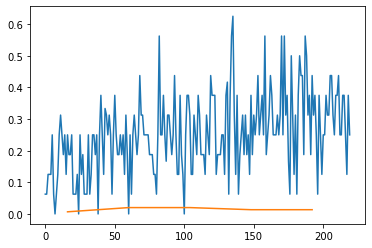

In [111]:
plt.plot(accuracy_record)
plt.plot(list(range(16, len(loss_record), 44)), valid_acc_record)

In [108]:
def validate(model, valid_loader):
  with torch.inference_mode():  # any torch computation under this indent will ignore gradient
    valid_loss = 0
    valid_acc = 0
    num_valid_samples = 0

    predicted_result = []
    label_result = []
    for batch in tqdm(valid_loader, leave=False):
      audio, label = batch
      pred = model(audio.cuda())
      prob = pred.softmax(dim=1)
      prob_of_correct_class = prob[torch.arange(len(label)), label]
      nll = -torch.log(prob_of_correct_class + 1e-8)
      # loss = nll.mean()

      valid_loss += nll.sum().item()
      acc = get_accuracy(pred, label)
      valid_acc += acc * len(label)
      num_valid_samples += len(label)

      predicted_result += pred.argmax(dim=-1).tolist()
      label_result += label.tolist()
    valid_loss /= num_valid_samples
    valid_acc /= num_valid_samples
    valid_loss_record.append(valid_loss)
    valid_acc_record.append(valid_acc)
  return valid_loss_record, valid_acc_record, predicted_result, label_result

valid_loss_record, valid_acc_record, predicted_result, label_result = validate(model, valid_loader)

  0%|          | 0/10 [00:00<?, ?it/s]

In [107]:
for x, y in zip(predicted_result, label_result):
  print(x,y)

7 9
9 0
7 6
3 5
5 2
9 8
6 9
5 7
8 9
9 1
9 1
1 1
6 6
1 1
6 7
9 3
2 0
7 4
5 5
9 3
9 8
2 1
1 1
1 1
8 8
6 6
9 4
6 3
8 9
8 5
9 3
8 5
9 3
4 3
5 0
7 4
1 1
8 4
6 4
4 4
9 2
5 5
2 1
1 0
4 6
7 9
7 9
7 3
8 8
7 7
9 7
7 9
7 3
9 0
5 5
1 1
6 6
7 8
9 9
9 1
4 8
5 4
8 1
2 2
1 1
4 0
6 6
9 5
9 5
8 0
6 6
9 6
9 7
6 2
1 1
4 8
8 7
5 9
5 7
6 9
6 6
8 0
7 3
8 4
9 2
6 4
6 2
7 6
8 7
9 9
6 2
4 4
2 2
9 0
6 6
9 9
9 5
9 2
7 4
7 6
1 1
1 1
1 1
6 6
7 4
7 2
9 2
8 4
8 8
6 2
6 6
9 7
7 3
6 6
6 3
3 7
8 0
4 0
8 5
8 9
2 5
1 1
8 8
8 2
8 6
5 1
7 8
1 1
9 0
9 1
7 4
9 1
6 7
9 5
3 8
9 2
7 6
8 3
7 4
4 3
7 3
7 2
5 5
6 6
5 5
7 4
5 0
8 2
4 4
9 3


In [152]:
audio, label = dataset[100]


In [156]:
test_pred = model(audio.unsqueeze(0).cuda())

In [157]:
test_pred.softmax(dim=-1)

tensor([[    0.0103,     0.7943,     0.0172,     0.0066,     0.0072,     0.0982,
             0.0005,     0.0221,     0.0368,     0.0067]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [159]:
predicted_class_idx = test_pred.argmax(dim=1).cpu().item()
dataset.genre_names[predicted_class_idx]

'classical'

In [160]:
ipd.Audio(audio, rate=22050)

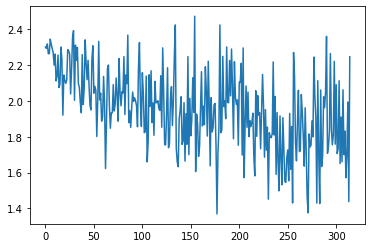

In [150]:
plt.plot(loss_record)

In [140]:
audio.shape, label

(torch.Size([8, 22050]), tensor([6, 2, 5, 3, 1, 8, 6, 0]))

In [143]:
torch.arange(8), label

(tensor([0, 1, 2, 3, 4, 5, 6, 7]), tensor([6, 2, 5, 3, 1, 8, 6, 0]))

In [148]:
prob = pred.softmax(dim=1)
prob_of_correct_class = prob[torch.arange(len(label)), label]

nll = -torch.log(prob_of_correct_class + 1e-8)
nll.mean()

tensor(2.3112, device='cuda:0', grad_fn=<MeanBackward0>)

In [141]:
pred.softmax(dim=1)

tensor([[0.1011, 0.1078, 0.0964, 0.0965, 0.1073, 0.0900, 0.1043, 0.1017, 0.0966,
         0.0983],
        [0.0966, 0.1076, 0.0980, 0.0985, 0.1071, 0.0911, 0.1092, 0.0968, 0.0961,
         0.0990],
        [0.0999, 0.1073, 0.0974, 0.0972, 0.1091, 0.0917, 0.1058, 0.0990, 0.0948,
         0.0979],
        [0.1025, 0.1110, 0.0962, 0.0957, 0.1082, 0.0912, 0.1029, 0.0993, 0.0966,
         0.0965],
        [0.0993, 0.1044, 0.0936, 0.1016, 0.1059, 0.0925, 0.1106, 0.0981, 0.0952,
         0.0987],
        [0.1003, 0.1094, 0.0957, 0.0992, 0.1075, 0.0929, 0.1072, 0.0959, 0.0957,
         0.0962],
        [0.1005, 0.1086, 0.0976, 0.0963, 0.1085, 0.0905, 0.1029, 0.1006, 0.0971,
         0.0974],
        [0.1011, 0.1114, 0.0969, 0.0950, 0.1086, 0.0906, 0.1018, 0.1004, 0.0968,
         0.0975]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [112]:
for batch in dataloader:
  break
batch.shape

torch.Size([8, 22050])